## Machine Learning Zoomcamp


## Session # 2 Homework






## Alfredo Baron Ocampo

In [1]:
import numpy as np
import pandas as pd

### Dataset
New York City Airbnb Open Data

### EDA

* Load the data.
* Look at the `price` variable. Does it have a long tail? 

In [2]:
#Read the csv file
df = pd.read_csv('AB_NYC_2019.csv')
#Display feautures (columns) and number of examples (rows)
print('Number of examples ',df.shape[0])
print('Number of features ',df.shape[1])

Number of examples  48895
Number of features  16


In [3]:
#First 5 rows appended the last 5 rows
df.head().append(df.tail())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [4]:
#Info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Describe the data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
#Plot the dustribution of price
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<AxesSubplot:xlabel='price', ylabel='Count'>

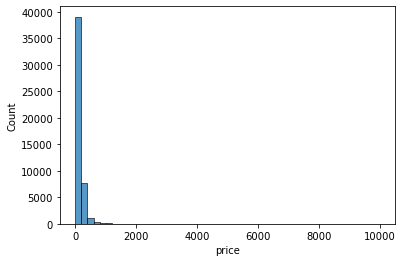

In [7]:
sns.histplot(df.price,bins=50)

#### Answer
Yes, the price column has a long tail

### Features

Use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them.

In [8]:
#Select columns of initiual data frame
data = df[['latitude',
          'longitude',
          'price',
          'minimum_nights',
          'number_of_reviews',
          'reviews_per_month',
          'calculated_host_listings_count',
          'availability_365']]
#Display first 5 rows
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### Question 1

Find a feature with missing values. How many missing values does it have?

In [9]:
#Find missign values of all fields in data frame
data.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [10]:
print('Median of minimum_nights = ', np.nanmedian(data.minimum_nights))

Median of minimum_nights =  3.0


### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the `np.log1p()` function.

In [11]:
#Initial numbers
n = len(df)
n_val = int(n * 0.2) #Validation 20%
n_test = int(n * 0.2) #Test 20%
n_train = n - n_val - n_test #Train 60% remaining
idx = np.arange(n) #Set all indexes
n_train, n_val, n_test

(29337, 9779, 9779)

In [12]:
#Shuffle the initial dataset, use seed 42
np.random.seed(42)
np.random.shuffle(idx)
#Set the data frames train/val/test
df_train = df.iloc[idx[:n_train]] #first 60%
df_val = df.iloc[idx[n_train:n_train+n_val]] #from 60% to 80%
df_test = df.iloc[idx[n_train+n_val:]] # from 80% til end
#Reset indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
#Log transformation
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
#Delete price from data frames
del df_train['price']
del df_val['price']
del df_test['price']

len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

### Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
* For computing the mean, use the training only!
* Compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [13]:
#Mean of reviews_per_month
mean_rpm = np.nanmean(df_train.reviews_per_month)
#Columns to use in the regression
base = ['minimum_nights', 
        'number_of_reviews', 
        'calculated_host_listings_count',
        'availability_365',
        'reviews_per_month']
X1_train = df_train[base].fillna(0).values #Fill missing values with 0
X2_train = df_train[base].fillna(mean_rpm).values #Fill missing values with mean

In [14]:
#Function definition from class
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [15]:
#Function definition from class
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [16]:
#Linear Regression from missign values filled with 0
w0_1, w_1 = train_linear_regression(X1_train, y_train)
y1_pred = w0_1 + X1_train.dot(w_1)
rmse1 = round(rmse(y_train, y1_pred),2)
print('RMSE for missign values with 0 = ', rmse1)
#Linear Regression from missign values filled with mean
w0_2, w_2 = train_linear_regression(X2_train, y_train)
y2_pred = w0_2 + X2_train.dot(w_2)
rmse2 = round(rmse(y_train, y2_pred),2)
print('RMSE for missign values with mean = ', rmse2)

RMSE for missign values with 0 =  0.68
RMSE for missign values with mean =  0.68


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [17]:
#Function definition from class
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [18]:
#Function definition from class
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [19]:
#Loop for r in the regularized linear regression
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    #Fill missing values
    X_train = prepare_X(df_train)
    #Linear regression
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    #Prediction
    y_pred = w0 + X_train.dot(w)
    #Score RMSE
    score = round(rmse(y_train, y_pred),2)
    
    print(r, w0, score)

0 4.702931815270082 0.68
1e-06 4.702931814926244 0.68
0.0001 4.702931780886199 0.68
0.001 4.702931471431235 0.68
0.01 4.7029283768839365 0.68
0.1 4.702897431640837 0.68
1 4.7025880021956645 0.68
5 4.701213265664852 0.68
10 4.69949600460067 0.68


### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

In [20]:
#Split data df into 60% training, 20% validation and 20% testing
def split_data(df, s):
    #Initial numbers
    n = len(df)
    n_val = int(n * 0.2) #Validation 20%
    n_test = int(n * 0.2) #Test 20%
    n_train = n - n_val - n_test #Train 60% remaining
    idx = np.arange(n) #Set all indexes
    #Shuffle the initial dataset, use seed 42
    np.random.seed(s)
    np.random.shuffle(idx)
    #Set the data frames train/val/test
    df_train = df.iloc[idx[:n_train]] #first 60%
    df_val = df.iloc[idx[n_train:n_train+n_val]] #from 60% to 80%
    df_test = df.iloc[idx[n_train+n_val:]] # from 80% til end
    #Reset indexes
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    #Log transformation
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    #Delete price from data frames
    del df_train['price']
    del df_val['price']
    del df_test['price']
    return df_train, df_val, df_test, y_train, y_val, y_test

In [21]:
#Array to store score results
scores = np.empty([0])
#Loop for all values
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    #Split the data with seed s
    df_train, df_val, df_test, y_train, y_val, y_test = split_data(df,s)
    #Fill missing values
    X_train = prepare_X(df_train)
    #Linear regression
    w0, w = train_linear_regression(X_train, y_train)
    #Predicted data
    y_pred = w0 + X_train.dot(w)
    #Calculate score
    score = round(rmse(y_train, y_pred),2)
    #Add score to array
    scores = np.append(scores,score)
    print(score)
#Verify array with values calculated
scores

0.69
0.68
0.69
0.69
0.68
0.69
0.69
0.68
0.69
0.69


array([0.69, 0.68, 0.69, 0.69, 0.68, 0.69, 0.69, 0.68, 0.69, 0.69])

In [22]:
#Calculate standard deviation
sd = np.std(scores)
round(sd,3)

0.005

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Train a model with `r=0.001`.
* What's the RMSE on test dataset?

In [23]:
#Split the data with seed 9
df_train, df_val, df_test, y_train, y_val, y_test = split_data(df,9)
#Concatenate X train + val
df_full_train = pd.concat([df_train, df_val])
#Reset indexes
df_full_train = df_full_train.reset_index(drop=True)
#Fill missing values
X_full_train = prepare_X(df_full_train)

In [24]:
#Concatenate y train + val
y_full_train = np.concatenate([y_train, y_val])

In [25]:
#Values of linear regression with r=0.001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [26]:
#Verify with test data
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = round(rmse(y_test, y_pred),2)
score

0.69